In [47]:
url='https://data.seattle.gov/api/views/mdbt-9ykn/rows.csv?accessType=DOWNLOAD'

In [48]:
from urllib.request import urlretrieve
urlretrieve(url,'Fremont.csv')

('Fremont.csv', <http.client.HTTPMessage at 0x163acbff0b8>)

In [62]:
import pandas as pd
data=pd.read_csv('Fremont.csv',index_col='Date',parse_dates=True)
data.head()

,Fremont Bridge West Sidewalk,Fremont Bridge East Sidewalk
Date,,
01/01/2017 12:00:00 AM,27417,22388
12/01/2018 12:00:00 AM,28397,18544
11/01/2016 12:00:00 AM,35493,28604
02/01/2016 12:00:00 AM,30674,29707
12/01/2016 12:00:00 AM,21552,17385


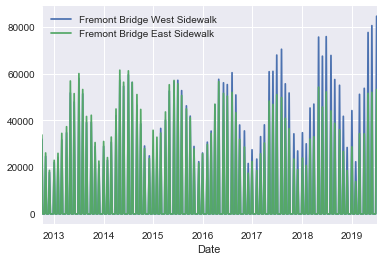

In [50]:
%matplotlib inline
data.resample('W').sum().plot();

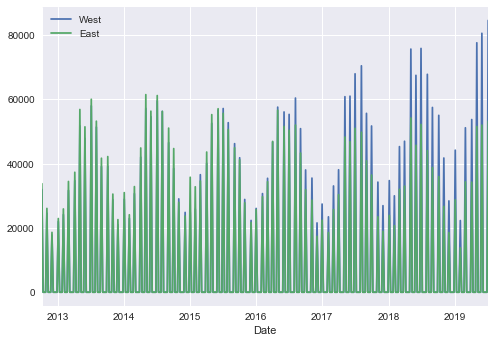

In [52]:
import matplotlib.pyplot as plt
data.columns=['West','East']
plt.style.use('seaborn')
data.resample('W').sum().plot();

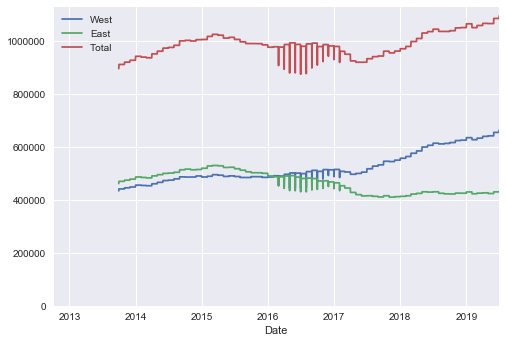

In [54]:

data['Total']=data['West']+data['East']
ax=data.resample('D').sum().rolling(365).sum().plot();
ax.set_ylim(0,None);

In [60]:
data.groupby(data.index.time).mean()

,West,East,Total
00:00:00,43964.304878,38388.707317,82353.012195


In [61]:
pivoted=data.pivot_table('Total',index=data.index.time,columns=data.index.date)
pivoted.iloc[:5,:5]

,2012-10-01,2012-11-01,2012-12-01,2013-01-01,2013-02-01
00:00:00,65695,50647,36369,44884,50027
